<a href="https://colab.research.google.com/github/vishal310197/Big-Data/blob/main/Copy_of_Social_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# import libraries
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re

In [2]:
Tweet_df = pd.read_csv('tweetyear.csv')
len(Tweet_df)

48934

In [ ]:
Tweet_df['Language'].value_counts()

en    28099
fi    16315
sv     3859
no      348
da      241
is       42
ar       30
Name: Language, dtype: int64

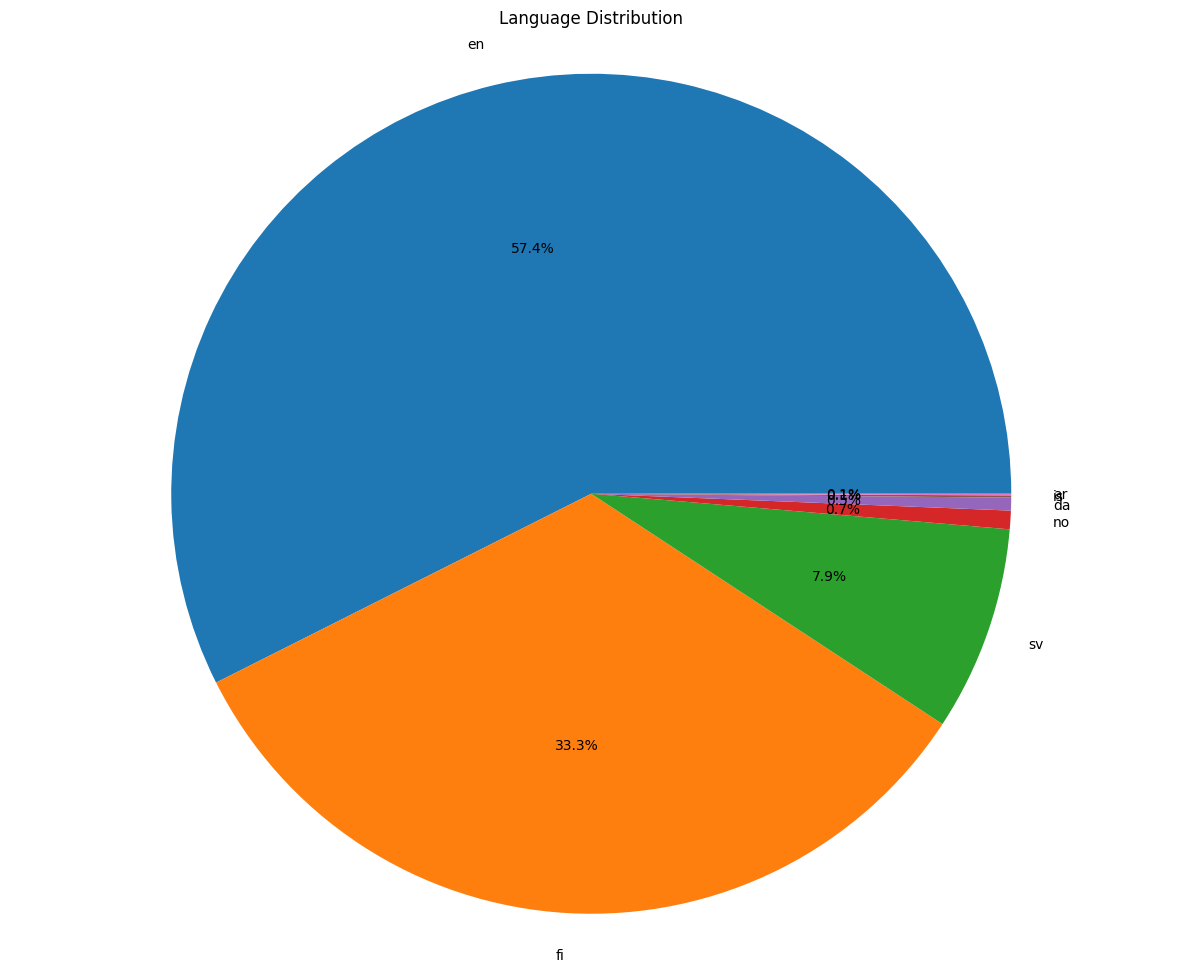

In [ ]:


# Count the occurrences of each language
language_counts = Tweet_df['Language'].value_counts()

# Increase the figure size
plt.figure(figsize=(15, 12))


# Create the pie chart
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%')

# Set aspect ratio to make the pie chart circular
plt.axis('equal')

# Add a title
plt.title('Language Distribution')

# Display the chart
plt.show()


In [3]:
# Create an empty set to store the unique hashtags
import ast
import numpy as np
unique_hashtags = set()

# Iterate over each row in the 'Hashtags' column
for hashtags_str in Tweet_df['Hashtags']:
    # Skip the iteration if the value is NaN
    if isinstance(hashtags_str, float) and np.isnan(hashtags_str):
        continue
    # Convert the string representation of list into an actual list
    hashtags_list = ast.literal_eval(hashtags_str)
    # Iterate over each hashtag in the list and add it to the set
    for hashtag in hashtags_list:
        unique_hashtags.add(hashtag)

# Print the set of unique hashtags
print(unique_hashtags)
len(unique_hashtags)

{'ylpeästiAMK', 'paineluelvytys', 'sunrise', 'CBI2014', 'neuronal', 'teammsb', 'TrumpCrimeFamilyForPrison', 'GRINDTIME', 'RochestieistheBestPGinPROA', 'clocks', 'TrainingCamp', 'nuptials', 'finlan', 'dudechillingpark', 'mycitype', 'realestatekenya', 'StarLifeEnt', 'weird', 'HEMS', 'BULLZILLA123', 'cristmas', 'captionthis', 'Atache', 'mtvuutiset', 'SvtAgenda', 'OperationCLAWLOCK', 'vaikuttaminen', 'pspuoluekokous', 'sunday', 'paj', 'GoSpursGo', 'ExpertLecture', 'RespectThem', 'kestilä', 'Sairaudet', 'final', 'kindredspirits', 'request', 'phsote', 'CTCN', 'MySmartHealth', 'ChangingLives', 'seksuaaliterveystyö', 'testi', 'LogiMAT', 'itäsuomi', 'MrsCarterShow', 'earlBaily', 'Nairobi', 'MOBBROTHERZ', 'personangrepp', 'muistatko', 'mariupol', 'Finovate', 'koulubussi', 'oppimisympäristö', 'investments', 'bigdaddys', 'NepalEarthquake', 'Mogelovich', '2k17', 'grillar', 'Evakuointikeskus', 'chanllenger', 'Socialnomics', 'auttamistyö', 'alohaohanaforever', 'lithiumion', 'cici', 'ThreeTap', 'Voyag

31330

In [4]:
# Convert the 'Hashtags' column to lowercase
Tweet_df['Hashtags'] = Tweet_df['Hashtags'].astype(str).str.lower()

# create a list that contains main hashtags
main_hashtags= ['emergency', 'TrafficAccident', 'Ambulance', '112',
                 '113', 'Fire', 'Safety', 'SOS',
                 'SOSAlarm','ensihoito', 'punainenristi', 'hätäkeskus', 'liikenneonnettomuus', 'MSB'
                 , '110sentralen', 'kystvakten', 'ambulanssjukvård', '112dk'
                 , '112is', 'Landhelgisgaeslan', 'DMA_sikkerhed']

# Convert the list to lowercase
main_hashtags = [x.lower() for x in main_hashtags]

# define a regular expression to find hashtags in the dataframe's hashtag coulmn
regex = re.compile(r'\b(?:' + '|'.join(main_hashtags) + r')\b', re.IGNORECASE)

# extract only the relevant columns from the dataframe
relevant_columns = ['Hashtags']

# create a new column 'hashtags' containing a list of hashtags found in each tweet
Tweet_df['main_hashtag'] = Tweet_df[relevant_columns].apply(lambda x: list(set(re.findall(regex, x['Hashtags'])) & set(main_hashtags)), axis=1)

In [5]:
unique_hashtags = [x.lower() for x in unique_hashtags]
regex = re.compile(r'\b(?:' + '|'.join(unique_hashtags) + r')\b', re.IGNORECASE)
relevant_columns = ['Hashtags']
Tweet_df['all_hashtag'] = Tweet_df[relevant_columns].apply(lambda x: list(set(re.findall(regex, x['Hashtags'])) & set(unique_hashtags)), axis=1)

In [ ]:
Tweet_df.head(10)

Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1                   Id  \
0             0           0             0   911136538536407040   
1             1           1             1   774190149445963776   
2             2           2             2   191495285183234048   
3             3           3             3  1587562822539661314   
4             4           7             7  1404535197039747082   
5             5           8             8  1401938885588959239   
6             6           9             9  1335162374114963457   
7             7          10            10  1270425624633659394   
8             8          11            11  1269287793492217856   
9             9          13            13  1192459856080441345   

                        Date             User  \
0  2017-09-22 07:54:13+00:00           ackert   
1  2016-09-09 10:18:10+00:00  angelinaelander   
2  2012-04-15 11:56:48+00:00    foreignresort   
3  2022-11-01 21:50:47+00:00    KristinHaikio   
4  2021-06-14 20:24:20+00:00       bjornmgray   
5  2021-06-07 16:27:31+00:00     burny_burner   
6  2020-12-05 10:01:30+00:00      JessyGrades   
7  2020-06-09 18:40:46+00:00     Emmyhellgren   
8  2020-06-06 15:19:26+00:00      Qulinaristi   
9  2019-11-07 15:12:39+00:00         Skyder3n   

                                               Tweet  Retweet  Like Language  \
0  Reflective decor is important for safety and v...        0     0       sv   
1  Was in a #trafficaccident #yesterday got #hitb...        0     0       sv   
2  @bugazer Nice one! I'd have to be careful abou...        0     0       en   
3  A sucessful meeting with the expert-/userpanel...        0     2       en   
4  Ambulance emergency sirens https://t.co/rMhje3...        0     2       en   
5  Further proof that KSA has no idea what they a...        0     0       sv   
6  Have you been drinking? Choose who you would l...        0     0       en   
7  Keeping stockholm safe tonight. 🚑 #ivpa #ambul...        0     3       en   
8  Nothing is sacred. #Ambulance in service and p...        0     1       fi   
9  Our skilled ambulance workers🚑 also make a dif...        0     2       da   

                                            Hashtags    Place  Year  \
0                   ['volvocars', 'trafficaccident']   Sweden  2017   
1  ['trafficaccident', 'yesterday', 'hitbycar', '...   Sweden  2016   
2   ['netflix', 'totaladdiction', 'trafficaccident']  Denmark  2012   
3         ['mentalhealth', 'paramedic', 'ambulance']   Norway  2022   
4               ['ambulance', 'emergency', 'sirens']   Norway  2021   
5  ['ksa', 'ambulance', 'vemskattepengarlekerdomm...   Sweden  2021   
6  ['iceland', 'socialmarketing', 'police', 'ambu...  Iceland  2020   
7                              ['ivpa', 'ambulance']   Sweden  2020   
8                                      ['ambulance']  Finland  2020   
9  ['ambulance', 'hberedskab', 'sundhed', 'præhos...  Denmark  2019   

             main_hashtag                                        all_hashtag  
0       [trafficaccident]                       [volvocars, trafficaccident]  
1       [trafficaccident]  [yesterday, hitbycar, bruises, trafficaccident...  
2       [trafficaccident]         [totaladdiction, netflix, trafficaccident]  
3             [ambulance]               [paramedic, ambulance, mentalhealth]  
4  [ambulance, emergency]                     [ambulance, emergency, sirens]  
5             [ambulance]       [vemskattepengarlekerdommed, ambulance, ksa]  
6             [ambulance]  [accident, funeralservice, iceland, police, so...  
7             [ambulance]                                  [ivpa, ambulance]  
8             [ambulance]                                        [ambulance]  
9             [ambulance]  [sundhed, hberedskab, præhospital, paramedk, p...

In [ ]:
Tweet_df['all_hashtag'].value_counts()

[msb]                                                8629
[ensihoito]                                           970
[]                                                    546
[punainenristi]                                       454
[hgc, msb]                                            439
                                                     ... 
[hätäkeskus, pelastus, jäljet, poliisi]                 1
[hätäkeskus, poliisi, vaalit2019, oikeushallinto]       1
[hätäkeskus, finhems, biopankki, sydän]                 1
[hätäkeskus, apusaapuu, soita112, ensiapu]              1
[stairs, emergency, exit]                               1
Name: all_hashtag, Length: 24666, dtype: int64

Draw a histogram showing the popularity of the main hashtags highlighting the number of tweets per individual hashtag

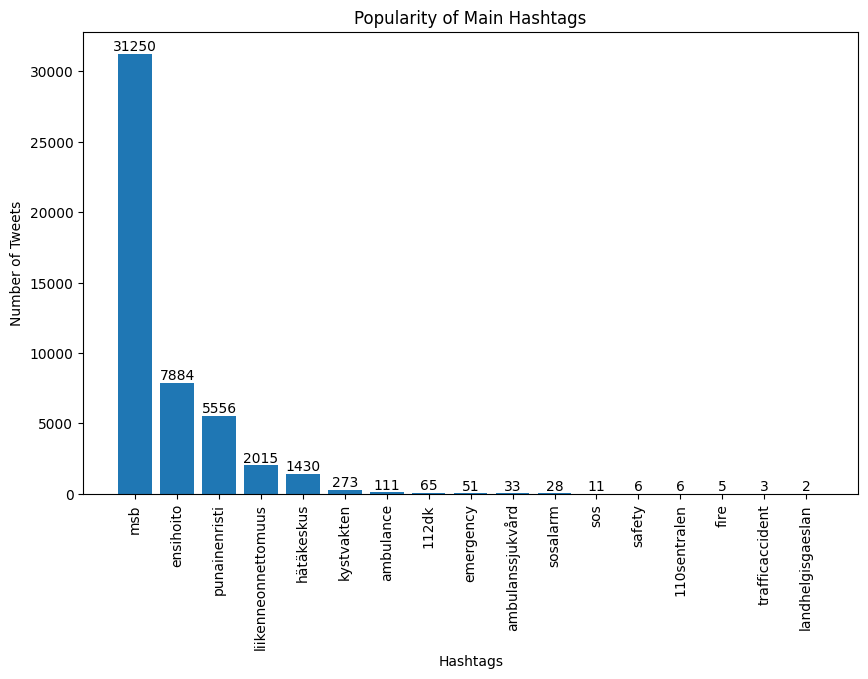

In [ ]:
# Extract the hashtags from the DataFrame
count_hashtags = []
for list in Tweet_df['main_hashtag']:
    for hashtag in list:
        count_hashtags.append(hashtag)

# Count the occurrences of each hashtag
count_hashtags = Counter(count_hashtags)

# convert to dictionary
count_hashtags = dict(count_hashtags)

# Sort the hashtags by their counts
count_hashtags = sorted(count_hashtags.items(), key=lambda x: x[1], reverse=True)
hashtags_key = [x[0] for x in count_hashtags]
hashtag_counts = [x[1] for x in count_hashtags]

# plot a histogram of hashtag occurrences
plt.figure(figsize=(10,6))
plt.bar(hashtags_key, hashtag_counts)
plt.xticks(rotation=90)
plt.xlabel('Hashtags')
plt.ylabel('Number of Tweets')
plt.title('Popularity of Main Hashtags')

# Add annotations for each bar
for i, count in enumerate(hashtag_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

Draw a graph that visualise the number of distinct Tweet users per individual hashtag

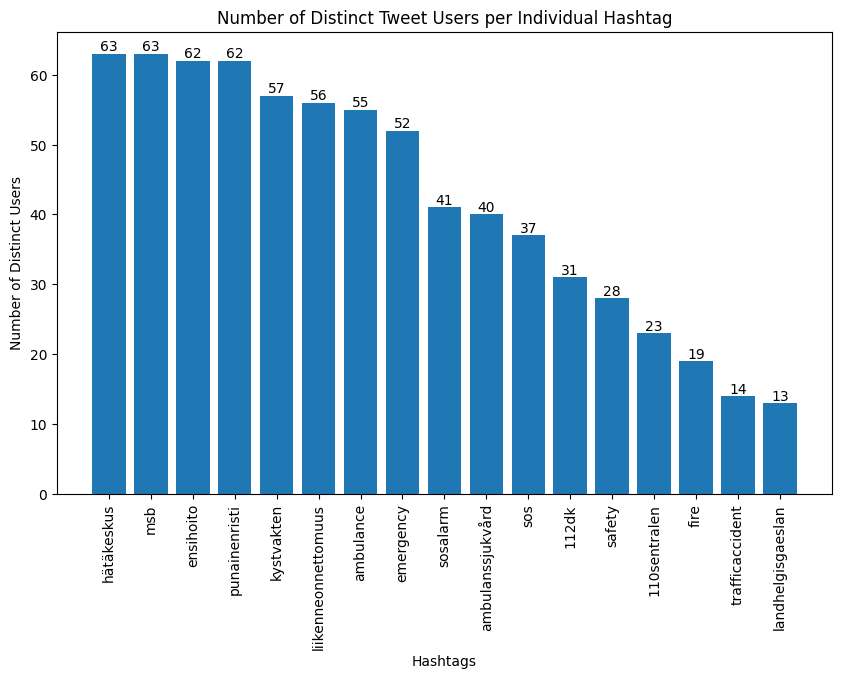

In [ ]:
# Extract the hashtags and users from the DataFrame
hashtags = []
users = []
for i, list in enumerate(Tweet_df['main_hashtag']):
    for hashtag in list:
        hashtags.append(hashtag)
        users.append(Tweet_df['User'][i])

# Count the number of distinct users for each hashtag
distinct_users_per_hashtag = {}
for i, hashtag in enumerate(hashtags):
    if hashtag not in distinct_users_per_hashtag:
        distinct_users_per_hashtag[hashtag] = set(users[i])
    else:
        distinct_users_per_hashtag[hashtag] |= set(users[i])

# Sort the hashtags by their counts
sorted_hashtags = sorted(distinct_users_per_hashtag.items(), key=lambda x: len(x[1]), reverse=True)
hashtags = [x[0] for x in sorted_hashtags]
users = [len(x[1]) for x in sorted_hashtags]

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(hashtags, users)
plt.xticks(rotation=90)
plt.xlabel('Hashtags')
plt.ylabel('Number of Distinct Users')
plt.title('Number of Distinct Tweet Users per Individual Hashtag')

# Add annotations for each bar
for i, count in enumerate(users):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

Sentiment Analysis using VADER Tool

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.7 MB/s eta 0:00:00


In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
import plotly.express as px
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# filter the dataframe to only include rows where main_hashtag has a value
# df_contain_main_hashtag = Tweet_df[Tweet_df['main_hashtag'].apply(lambda x: len(x) > 0)]
df_contain_main_hashtag = Tweet_df[Tweet_df['main_hashtag'].str.len() > 0]

# extract the full_text column from the filtered dataframe
Text = df_contain_main_hashtag["Tweet"]

def sentiment_scores(Text):
    # initialize sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()
    sentiment_dict = []

    # loop through each text and calculate sentiment scores
    for n in Text:
        value = analyzer.polarity_scores(n)
        sentiment_dict.append(value)

    return sentiment_dict


# calculate sentiment scores for the Text column
data = sentiment_scores(Text)

# create a dataframe from the sentiment scores
df = pd.DataFrame(data)

# create a scatter ternary plot using the negative, neutral, and positive sentiment scores
fig = px.scatter_ternary(df, a='neg', b='neu', c='pos')

fig.update_layout(
    title={
        'text': "Ternary Distribution plot",
        'y':.97,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# show the plot
plt.savefig("abc.png")
files.download("abc.png")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
len(Tweet_df['main_hashtag'])

NameError: ignored

Now build a social graph where each node corresponds to a hashtag and an edge between hashtag A and hashtag B indicates that there is at least one tweet which contains both hashtag A and hashtag B. Implement a small python program that allows you to identify hashtags in tweet messages and generate the above social network graph.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 29486 (\N{CJK UNIFIED IDEOGRAPH-732E}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 34880 (\N{CJK UNIFIED IDEOGRAPH-8840}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 36135 (\N{CJK UNIFIED IDEOGRAPH-8D27}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24065 (\N{CJK UNIFIED IDEOGRAPH-5E

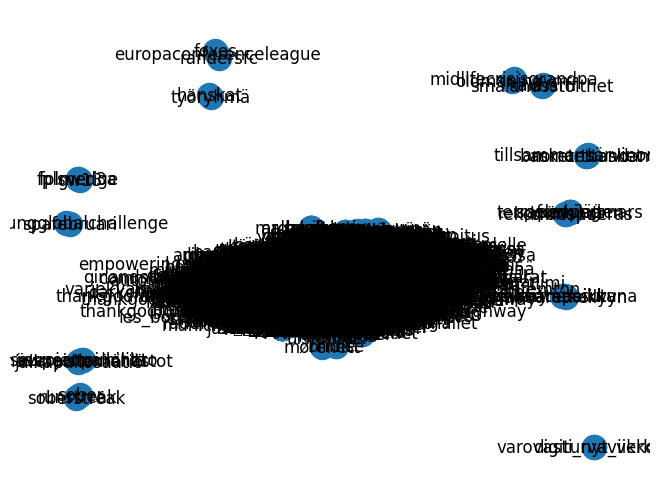

In [6]:
#import required library
import networkx as nx

# create an empty graph
graph = nx.Graph()

# extract the main_hashtag column from the dataframe
hashtags = Tweet_df['all_hashtag']

length = len(hashtags)

# loop through each row in the main_hashtag column
for i in range(length):
    for j in range(1, len(hashtags[i])):

        # add an edge between the first hashtag and all other hashtags in the row
        graph.add_edge(hashtags[i][0], hashtags[i][j])

# plot the graph
nx.draw(graph, with_labels=True)

In [ ]:
data = []
for u, v in graph.edges():
    data.append({'Source': u, 'Target': v})

graphdf = pd.DataFrame(data)
excel_file_path = 'social_network_data.xlsx'
graphdf.to_excel(excel_file_path, index=False)

In [ ]:
!pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
import community
import matplotlib.pyplot as plt


# Assuming you have already created a networkx graph called 'hashtag_graph' from your dataset

# Perform community detection using Louvain algorithm
partition = community.best_partition(graph)

# Print the number of detected communities
num_communities = len(set(partition.values()))
print("Number of communities:", num_communities)

# Print the communities and their corresponding hashtags
communities = {}
for hashtag, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [hashtag]
    else:
        communities[community_id].append(hashtag)

for community_id, hashtags in communities.items():
    print("Community", community_id, ":", hashtags)

# Visualize the network with node colors representing communities
pos = nx.spring_layout(graph)  # Layout for visualization
node_colors = [partition[node] for node in graph.nodes()]
nx.draw_networkx(graph, pos, node_color=node_colors, with_labels=False, node_size=50, cmap='viridis')
plt.show()


AttributeError: ignored

Number of communities: 798
Community 1 : frozenset({'ccm', 'dismembered', 'yeahbuddy', 'haar', 'killer', 'livingwater', 'glowwraaayyy', 'getaroundit', 'crabshack', 'p7ague', 'topbschools', 'lovetoday', 'sleepycat', 'psykförsvar', 'valentinesday2023', 'nigeria', 'weloveouremployees', 'rrhsenglish', 'brexit', '𝗥𝗘𝗡𝗘𝗦𝗔𝗡𝗦', 'teammsb', 'bowery', 'clocks', 'chi40club', 'loveofmylife', 'latepost', 'lsp', 'morninginspiration', 'ptt', 'yessgod', 'rappers', 'laligadk', 'resilience', 'reallyreally', 'golions', 'keepmoving', 'thahop', 'riyadhdrive', 'kronos', 'mycitype', 'maketodaycount', 'drottninggatan2017', 'hiphopkreyol', 'realtid', 'alwaysteampak', '80smetal90sflair', 'ida2016', 'viamanhattan', 'aslahpromo', 'sakaryameydanmuharebesi', 'together', 'rlr', 'aports', 'jorma', 'blok', 'nut', 'xculturalphl', 'itsstarboyz', 'losangeles', 'deloitte', 'babyyouthetypeilike', 'multi', 'shmishmas', 'marchmarbella', 'stpauli', 'fatherjohnmisty', 'blackflys', 'fuckmondays', 'mascotboys', 'goodmusic', 'nedor

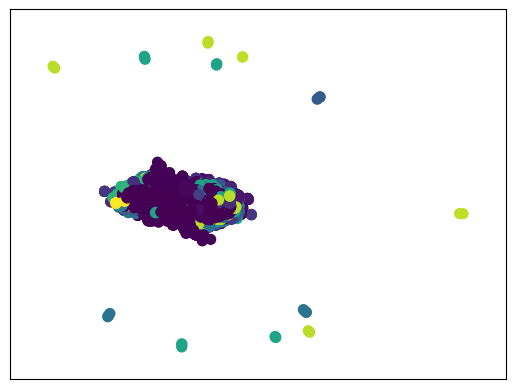

In [7]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt

# Assuming you have already created a networkx graph called 'hashtag_graph' from your dataset

# Perform community detection using Louvain algorithm
partition = community.greedy_modularity_communities(graph)

# Print the number of detected communities
num_communities = len(partition)
print("Number of communities:", num_communities)

# Print the communities and their corresponding hashtags
for idx, community in enumerate(partition):
    print("Community", idx+1, ":", community)

# Visualize the network with node colors representing communities
pos = nx.spring_layout(graph)  # Layout for visualization
node_colors = []
for node in graph.nodes():
    for idx, community in enumerate(partition):
        if node in community:
            node_colors.append(idx)
            break

nx.draw_networkx(graph, pos, node_color=node_colors, with_labels=False, node_size=50, cmap='viridis')
plt.show()


In [ ]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import requests

# Function to generate insights using DeepAI Text Generation API
def generate_insights(hashtags):
    url = "https://api.deepai.org/api/text-generator"
    data = {
        "text": f"The hashtags in this community are: {', '.join(hashtags)}"
    }
    headers = {
        "api-key": "1e2a6cbd-8da2-47ea-98a0-93d6f4df885e"
    }

    response = requests.post(url, data=data, headers=headers)
    if response.status_code == 200:
        result = response.json()
        return result["output"]
    else:
        return None

# Function to analyze each community and generate insights using DeepAI Text Generation API
def analyze_communities(partition):
    community_data = []

    for idx, community in enumerate(partition):
        insights = generate_insights(community) if community else None
        community_data.append((community, insights))

    df = pd.DataFrame(community_data, columns=['Community', 'Insights'])
    df.to_csv('community_insights.csv', index=False)
    print("Community insights saved to 'community_insights.csv' file.")

# Call the analyze_communities function
analyze_communities(partition)



KeyboardInterrupt: ignored

In [ ]:
import requests
import pandas as pd



# DeepAI API endpoint
api_url = 'https://api.deepai.org/api/text-generator'

# API key (Get your free API key from https://deepai.org/)
api_key = '1e2a6cbd-8da2-47ea-98a0-93d6f4df885e'

# Create a dataframe to store the insights
df = pd.DataFrame(columns=['Community', 'Insights'])

# Iterate through each community
for idx, community in enumerate(partition):
    # Convert frozenset to list and join the hashtags with a comma
    hashtags = ','.join(community)

    # API request payload
    payload = {
        'text': f'The insights for community {idx+1} with hashtags: {hashtags}',
        'apiKey': api_key
    }

    # Make the API request
    response = requests.post(api_url, data=payload)

    # Parse the response
    if response.status_code == 200:
        insights = response.json()['output']
    else:
        insights = 'Error: Unable to generate insights'

    # Add the community and insights to the dataframe
    df.loc[idx] = [hashtags, insights]

# Save the dataframe to an Excel file
df.to_csv('community_insights.csv', index=False)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
graph = nx.Graph()

# Extract the main_hashtag column from the dataframe
hashtags = Tweet_df['all_hashtag']

length = len(hashtags)

# Loop through each row in the main_hashtag column
for i in range(length):
    for j in range(1, len(hashtags[i])):
        # Add an edge between the first hashtag and all other hashtags in the row
        graph.add_edge(hashtags[i][0], hashtags[i][j])

# Create the layout for the graph
layout = nx.spring_layout(graph)

# Plot the graph using matplotlib and pygraphviz
plt.figure(figsize=(100, 100))
nx.draw_networkx(graph, pos=layout, with_labels=True, node_size=10, font_size=8, alpha=0.7, linewidths=0.3)
plt.axis('off')
plt.show()


Degree Distribution and Local Clustering Coefficient Distribution

In [ ]:
# calculate the graph properties
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()
avg_degree_centrality = nx.degree_centrality(graph)

# loop to iterate for values
resulted = dict()
for key in avg_degree_centrality:

    # rounding to K using round()
    resulted[key] = round(avg_degree_centrality[key], 2)

avg_degree_centrality = str(resulted)


clustering_coefficient = nx.average_clustering(graph)
largest_component_size = len(max(nx.connected_components(graph), key=len))

# create the summary table
table = [
    ["Number of nodes", num_nodes],
    ["Number of edges", num_edges],
    ["Average degree centrality", avg_degree_centrality],
    ["Clustering coefficient", round(clustering_coefficient,2)],
    ["Size of largest component", largest_component_size]
]

# print the table
print("Graph Summary Table:")
for row in table:
    print("{:<28} {:<10}".format(row[0], row[1]))

NameError: ignored

In [ ]:
import requests
import pandas as pd

# MeaningCloud API endpoint
api_endpoint = "https://api.meaningcloud.com/topics-2.0"

# Your MeaningCloud API key
api_key = "613d6d809c0c2c218fde96cf63455583"

# List of communities
communities = [
    frozenset({'gopaperless', 'bulksign', 'secureandcompliant', 'digitalsignatures', 'documentautomation', 'gosmart', 'workflowautomation', 'electronicsignatures', 'godigital', 'taxday', 'efiling', 'businessefficiency', 'authentication', 'documentmanagement', 'indiastack', 'electronicsigning', 'digitalindia', 'paytaxes', 'aadhaar'}),
    frozenset({'딱10cm만', 'h1ghrmusic', '권정열', '10cm', '빅나티', 'dingofreestyle', '토일', 'dflive', '서동현', '하이어뮤직', 'just10centimeters', '정이라고하자', 'toil', 'bignaughty', '매직스트로베리사운드', '십센치', '딩고프리스타일'})
]

# Empty list to store insights
insights = []

# Iterate over each community
for community in communities:
    # Join the hashtags with a space separator
    hashtags = " ".join(community)

    # Make a request to the MeaningCloud API
    response = requests.post(api_endpoint, params={
        "key": api_key,
        "lang": "en",
        "txt": hashtags,
        "tt": "ec"
    })

    # Parse the response JSON
    json_response = response.json()

    # Extract the insights from the response
    if "entity_list" in json_response:
        entities = json_response["entity_list"]
        insight = ", ".join(entity["form"] for entity in entities)
    else:
        insight = "No insights found."

    # Add the insight to the list
    insights.append(insight)

# Create a DataFrame to store the insights
df = pd.DataFrame({'Community': communities, 'Insight': insights})

# Save the DataFrame to an Excel file
#df.to_excel('community_insights.xlsx', index=False)

df.head()


Community  \
0  (godigital, taxday, digitalindia, secureandcom...   
1  (하이어뮤직, 딱10cm만, 권정열, toil, bignaughty, h1ghrmu...   

                        Insight  
0                                
1  h1ghrmusic just10centimeters

In [8]:
!pip install requests beautifulsoup4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import csv
import requests
from bs4 import BeautifulSoup
import urllib3

In [13]:
# Disable SSL certificate verification
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# Function to scrape community insights from the website
def scrape_insights(community):
    url = f"https://www.communityinsights.com/{community}"
    response = requests.get(url, verify=False)
    soup = BeautifulSoup(response.text, 'html.parser')
    insights = soup.find('div', class_='insights').get_text().strip()
    return insights

In [15]:
communities = [
     frozenset({'gopaperless', 'bulksign', 'secureandcompliant', 'digitalsignatures', 'documentautomation', 'gosmart', 'workflowautomation', 'electronicsignatures', 'godigital', 'taxday', 'efiling', 'businessefficiency', 'authentication', 'documentmanagement', 'indiastack', 'electronicsigning', 'digitalindia', 'paytaxes', 'aadhaar'}),
    frozenset({'딱10cm만', 'h1ghrmusic', '권정열', '10cm', '빅나티', 'dingofreestyle', '토일', 'dflive', '서동현', '하이어뮤직', 'just10centimeters', '정이라고하자', 'toil', 'bignaughty', '매직스트로베리사운드', '십센치', '딩고프리스타일'})
    # Add more communities here
]

# Create a CSV file to store the insights
with open('community_insights.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Community', 'Insights'])  # Write the header

    # Iterate over each community and scrape insights
    for community in communities:
        # Convert the frozenset to a string for the URL
        community_string = '+'.join(community)

        try:
            insights = scrape_insights(community_string)
        except Exception as e:
            insights = f"Failed to retrieve insights: {str(e)}"

        writer.writerow([community, insights])  # Write community and insights to CSV
        print(f"Processed community: {community}")

print("Community insights saved to community_insights.csv")

Processed community: frozenset({'secureandcompliant', 'efiling', 'businessefficiency', 'electronicsigning', 'electronicsignatures', 'bulksign', 'gopaperless', 'documentautomation', 'gosmart', 'indiastack', 'godigital', 'authentication', 'aadhaar', 'paytaxes', 'workflowautomation', 'digitalindia', 'documentmanagement', 'digitalsignatures', 'taxday'})


KeyboardInterrupt: ignored